Basado en https://www.kaggle.com/code/pyarda/classification-algorithm-and-confusion-matrix/notebook

# MATRIZ DE CONFUSION

Vamos a comparar varios algoritmos de clasificación usando la matriz de confusión.

# Datos:

Los púlsares son un tipo raro de estrella de neutrones que produce emisiones de radio detectables aquí en la Tierra. Son de considerable interés científico como sondas del espacio-tiempo, el medio interestelar y los estados de la materia. Ahora se están utilizando herramientas de aprendizaje automático para etiquetar automáticamente a los candidatos a púlsar para facilitar un análisis rápido. En particular, se están adoptando ampliamente sistemas de clasificación que tratan los conjuntos de datos candidatos como problemas de clasificación binaria.

El crédito es para Pavan Raj (https://www.kaggle.com/pavanraj159) de donde se recopiló el conjunto de datos. Con el fin de crear un desafío, se han realizado ciertas modificaciones en el conjunto de datos.

In [3]:


import numpy as np
import pandas as pd #
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('/content/3.2.3 pulsar_stars.csv')

Análisis Exploratorio de Datos

In [5]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [7]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [8]:
print(df.target_class.value_counts())

target_class
0    16259
1     1639
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

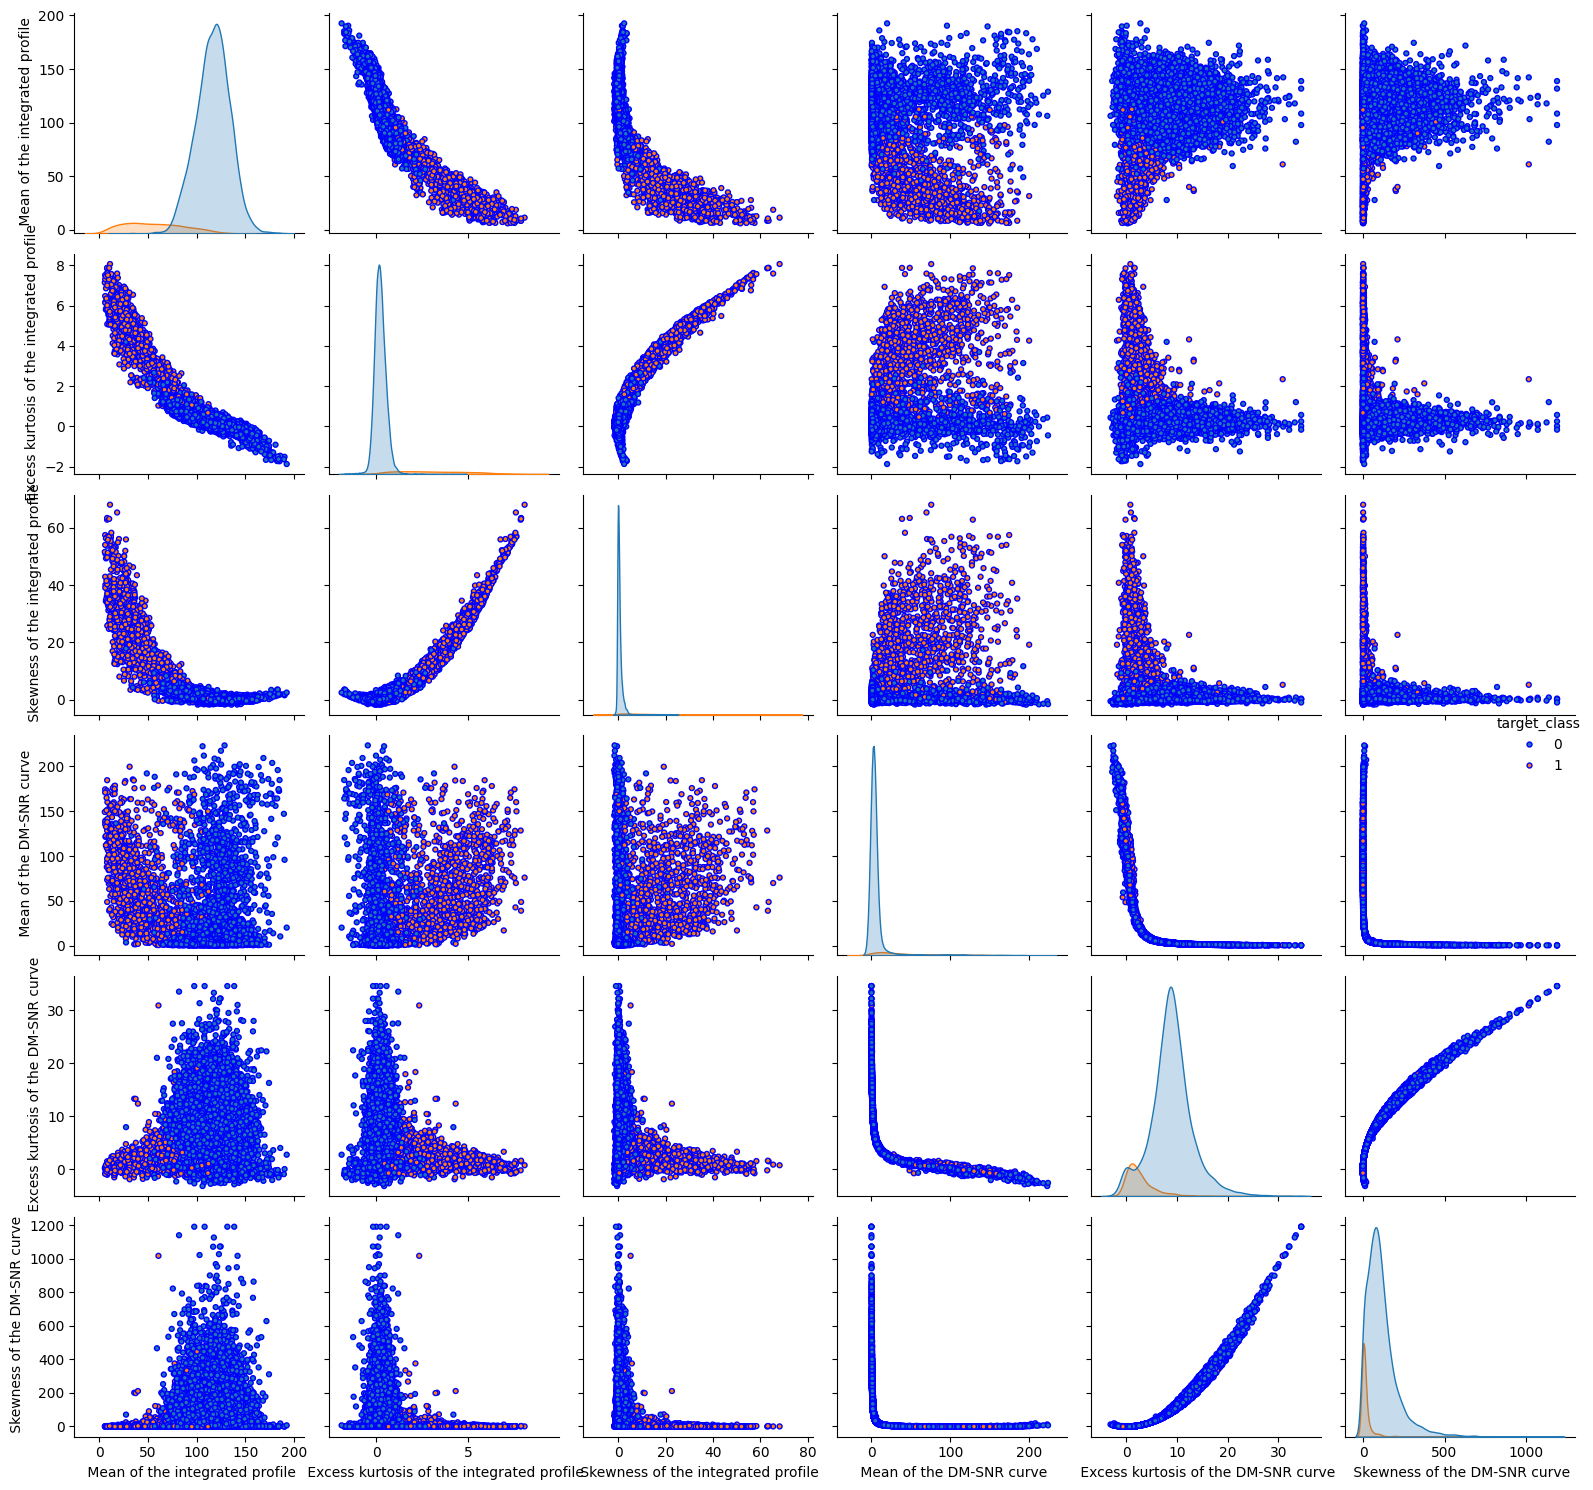

In [9]:
sns.pairplot(data=df,
             diag_kind="kde",
             markers=".",
             plot_kws=dict(s=50, edgecolor="b", linewidth=1),
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"],
                   diag_kws=dict(shade=True))

plt.tight_layout()
plt.show()

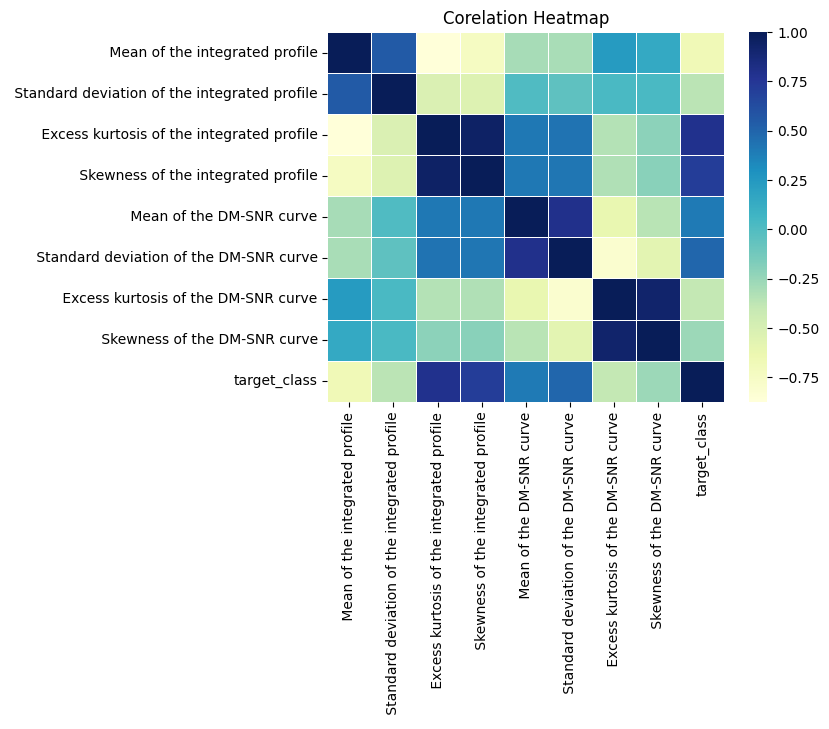

In [10]:
df.corr()
sns.heatmap(df.corr(),cmap="YlGnBu",linewidths=.5)
plt.title('Corelation Heatmap')
plt.show()

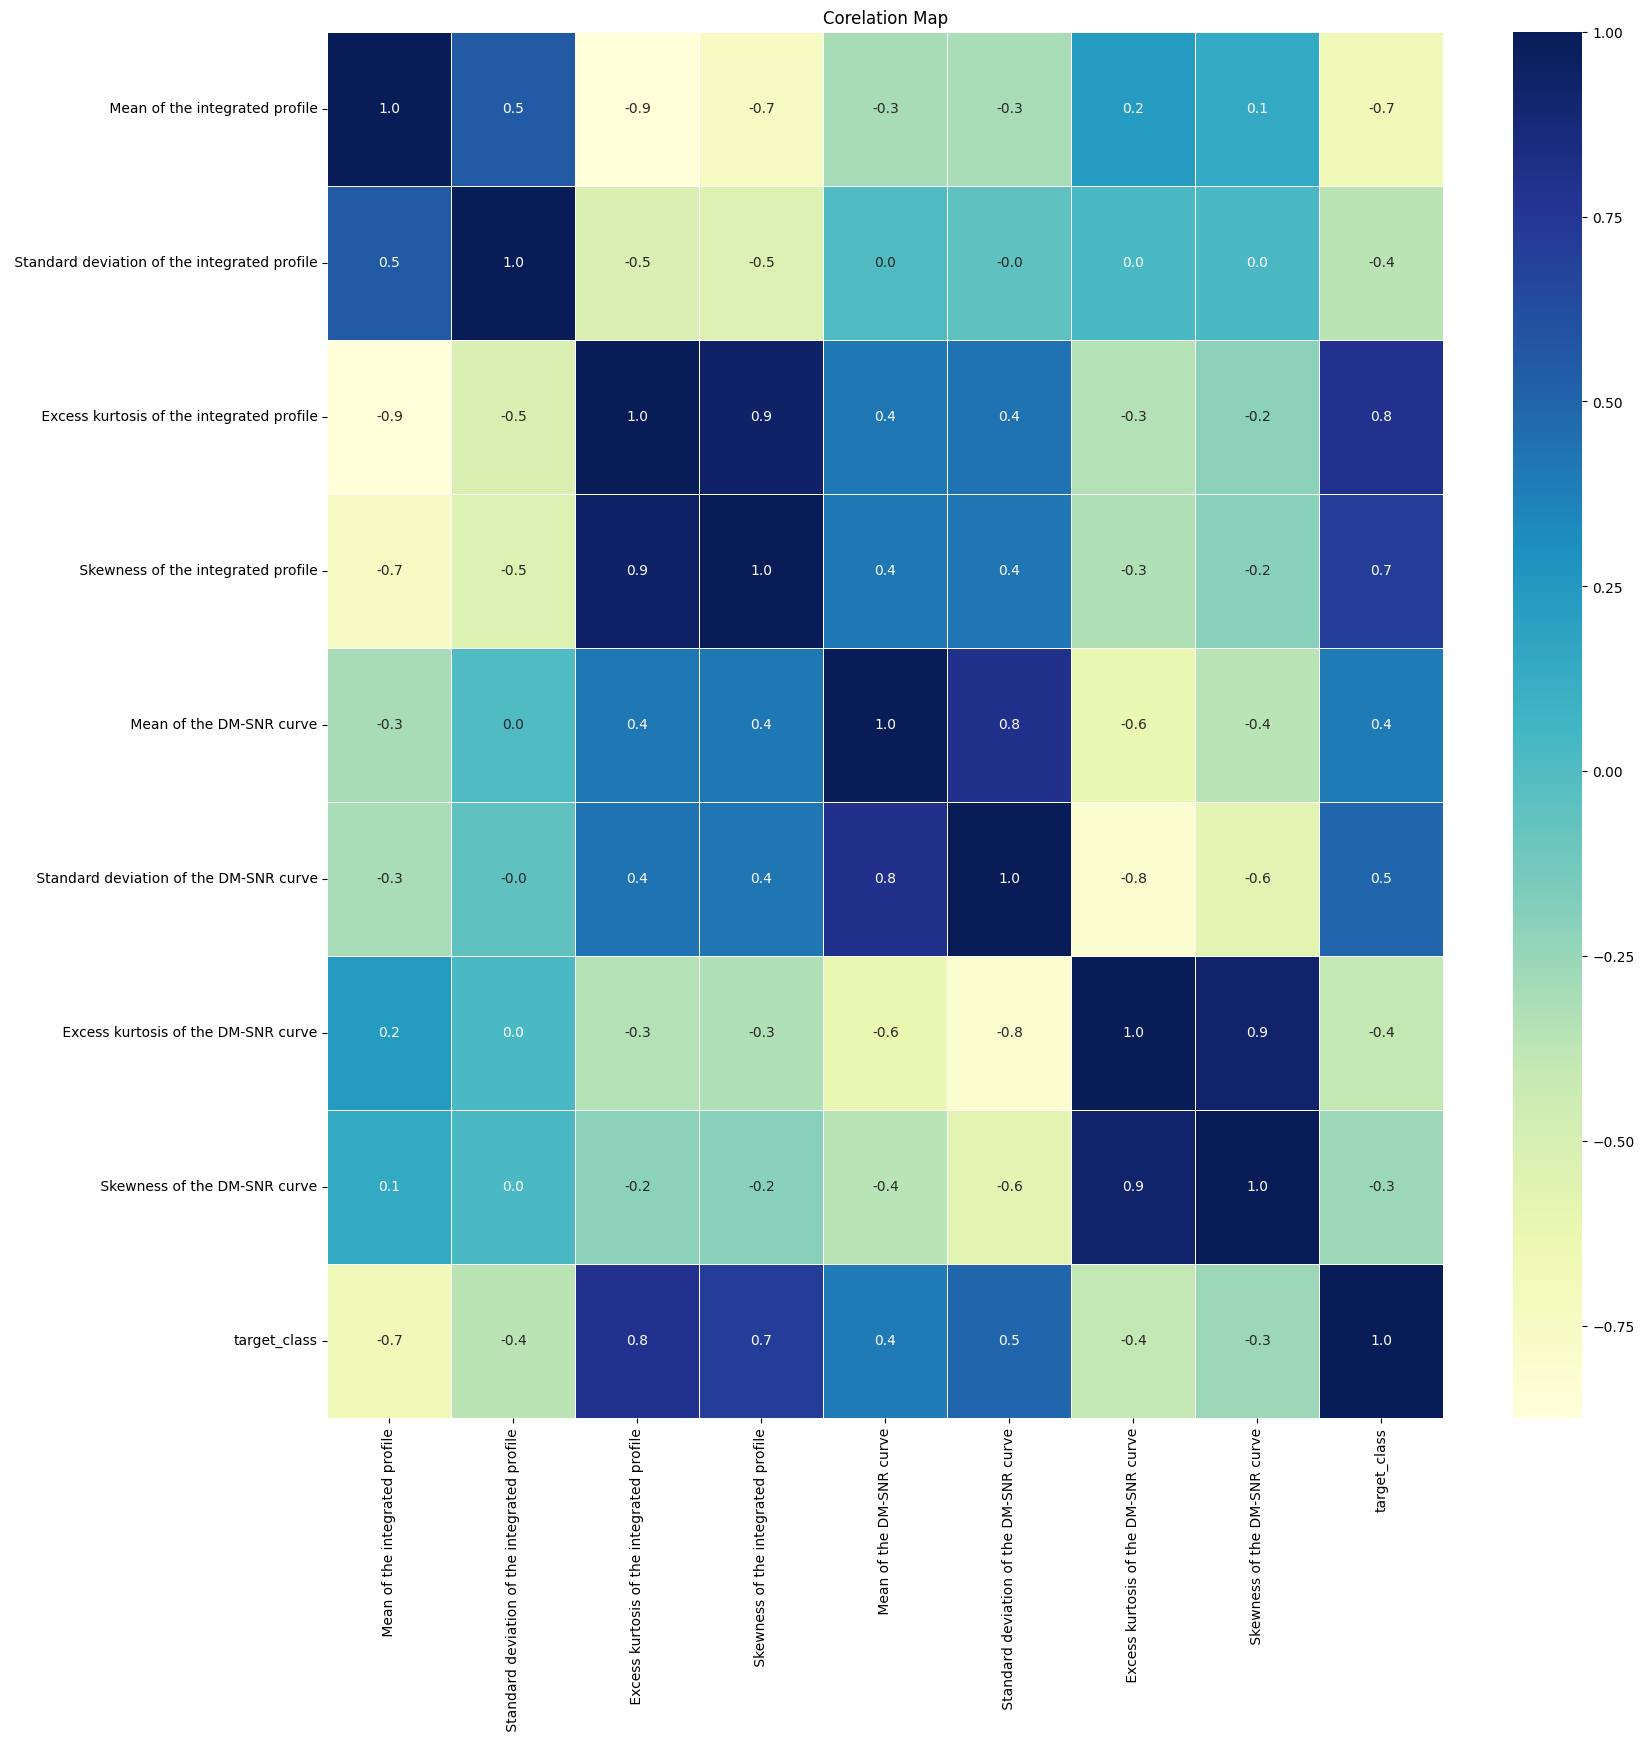

In [11]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="YlGnBu",fmt= '.1f',ax=ax)
plt.title('Corelation Map')
plt.show()

Logistic Regression

In [12]:
y=df.target_class.values
x_df=df.drop(['target_class'],axis=1)
#Normalización
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

In [13]:
# train/test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print('lr accuracy :', lr.score(x_test,y_test))

# confusion matrix
y_pred = lr.predict(x_test)
y_pred_lr = y_pred
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_true,y_pred)

lr accuracy : 0.946927374301676


KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print('knn accuracy :',knn.score(x_test,y_test))
# confisioun matrix
y_pred = knn.predict(x_test)
y_pred_knn = y_pred
y_true = y_test

# confisuon matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_true,y_pred)


knn accuracy : 0.970391061452514


Find best k value

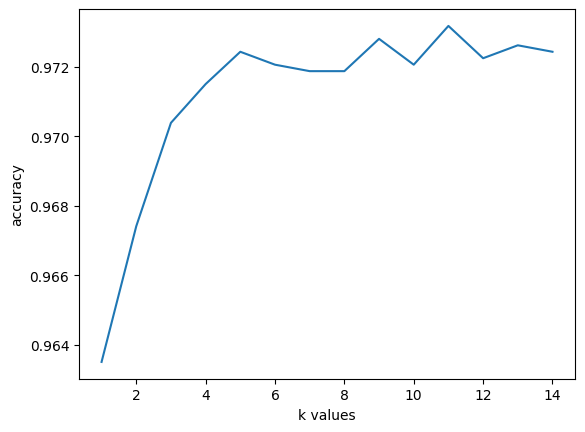

In [16]:
score_list=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

SVM

In [17]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print('svm accuracy :', svm.score(x_test,y_test))

# confisuon matrix
y_pred = svm.predict(x_test)
y_pred_svm = y_pred
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_true,y_pred)

svm accuracy : 0.9718808193668529


Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print('nb accuracy : ', nb.score(x_test,y_test))

# confisuon matrix
y_pred = nb.predict(x_test)
y_pred_nb = y_pred
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

nb accuracy :  0.9437616387337058


Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print('dt.accuracy : ', nb.score(x_test,y_test))

# confisuon matrix
y_pred = dt.predict(x_test)
y_pred_dt = y_pred
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)


dt.accuracy :  0.9437616387337058


Revisemos la Matriz de Confusión

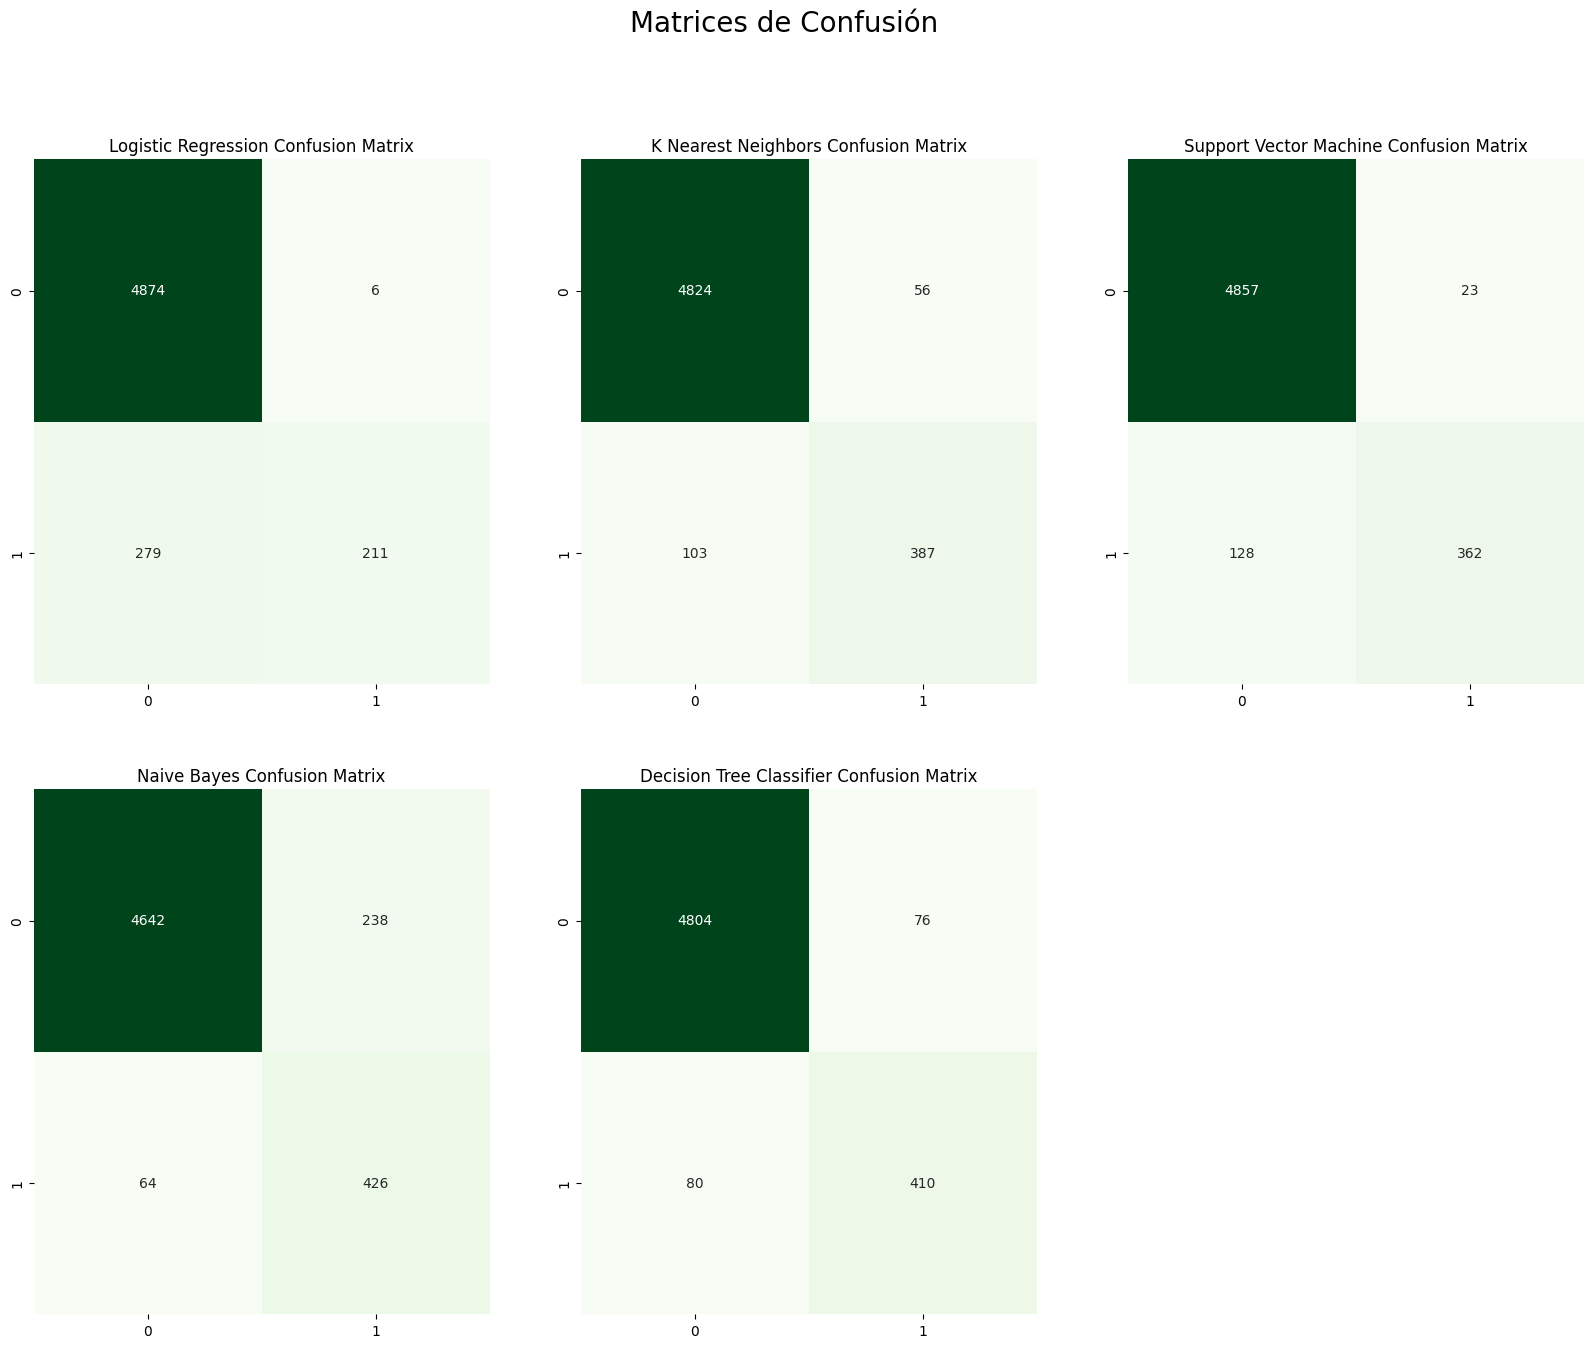

In [20]:
plt.figure(figsize=(20,15))

plt.suptitle("Matrices de Confusión",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.show()

In [21]:
from sklearn.metrics import classification_report

# Obtén el informe de métricas para cada modelo
report_lr = classification_report(y_true, y_pred_lr)
report_knn = classification_report(y_true, y_pred_knn)
report_svm = classification_report(y_true, y_pred_svm)
report_nb = classification_report(y_true, y_pred_nb)
report_dt = classification_report(y_true, y_pred_dt)

# Imprime los informes de métricas
print("Logistic Regression Classification Report:")
print(report_lr)

print("\nK Nearest Neighbors Classification Report:")
print(report_knn)

print("\nSupport Vector Machine Classification Report:")
print(report_svm)

print("\nNaive Bayes Classification Report:")
print(report_nb)

print("\nDecision Tree Classifier Classification Report:")
print(report_dt)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4880
           1       0.97      0.43      0.60       490

    accuracy                           0.95      5370
   macro avg       0.96      0.71      0.78      5370
weighted avg       0.95      0.95      0.94      5370


K Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4880
           1       0.87      0.79      0.83       490

    accuracy                           0.97      5370
   macro avg       0.93      0.89      0.91      5370
weighted avg       0.97      0.97      0.97      5370


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4880
           1       0.94      0.74      0.83       490

    accuracy                           0.97     

CONCLUSIÓN:  